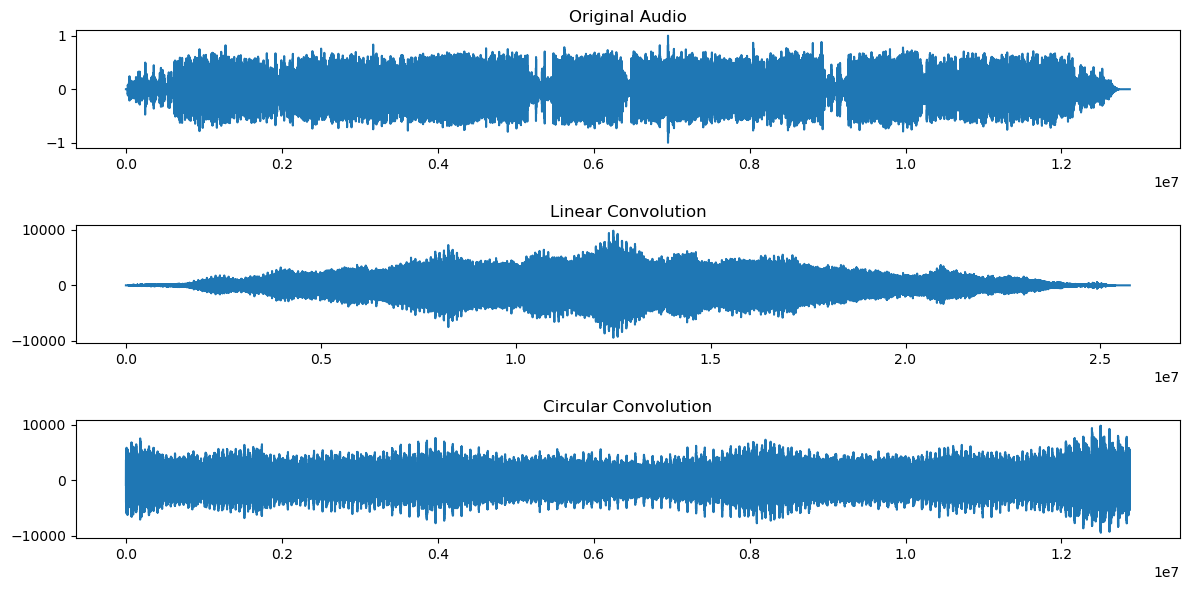

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import convolve, fftconvolve

audio, sr = sf.read(r'C:\Users\KOMARA MOHAN GOWDA\Downloads\Naa Gundelo.wav')
impulse, sr_imp = sf.read(r'C:\Users\KOMARA MOHAN GOWDA\Downloads\Naa Gundelo.wav')


if audio.ndim > 1:
    audio = audio[:, 0]
if impulse.ndim > 1:
    impulse = impulse[:,0]

linear_conv = convolve(audio, impulse, mode='full')

N = len(audio)
M = len(impulse)
circular_len = N
impulse_padded = np.pad(impulse, (0, N-M), 'constant')
circular_conv = np.fft.ifft(np.fft.fft(audio) * np.fft.fft(impulse_padded)).real

sf.write('Linear_conv.wav', linear_conv, sr)
sf.write('circular_conv.wav', circular_conv, sr)

plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt.plot(audio)
plt.title('Original Audio')
plt.subplot(3,1,2)
plt.plot(linear_conv)
plt.title('Linear Convolution')
plt.subplot(3,1,3)
plt.plot(circular_conv)
plt.title('Circular Convolution')
plt.tight_layout()
plt.show()

C:\Users\KOMARA MOHAN GOWDA\AppData\Local\Temp\ipykernel_14780\2355397156.py:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\KOMARA MOHAN GOWDA\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


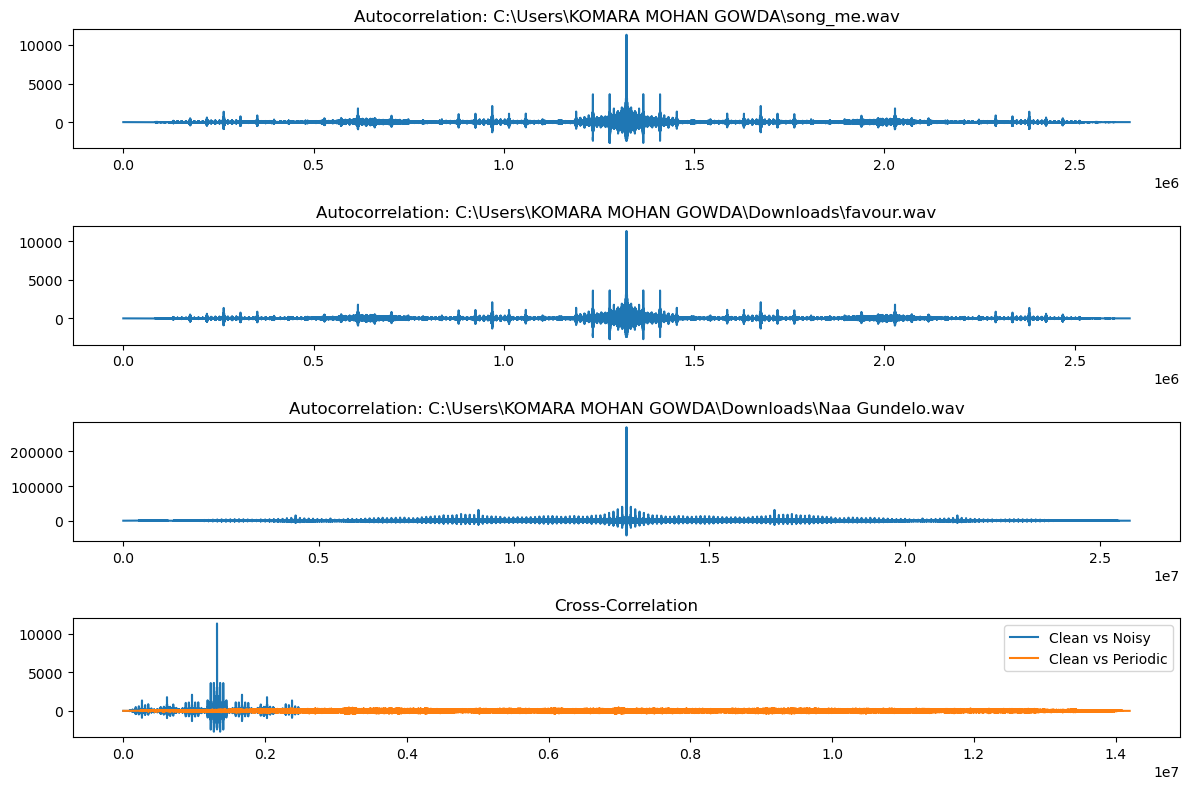

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import correlate

files = [
    r'C:\Users\KOMARA MOHAN GOWDA\song_me.wav', 
    r'C:\Users\KOMARA MOHAN GOWDA\Downloads\favour.wav', 
    r'C:\Users\KOMARA MOHAN GOWDA\Downloads\Naa Gundelo.wav'
]

audios = [sf.read(f)[0] for f in files]

for i in range(len(audios)):
    if audios[i].ndim > 1:
        audios[i] = audios[i][:,0]

autocorr = [correlate(a, a, mode='full') for a in audios]
cross_corr_clean_noisy = correlate(audios[0], audios[1], mode='full')
cross_corr_clean_periodic = correlate(audios[0], audios[2], mode='full')

plt.figure(figsize=(12,8))

for i, ac in enumerate(autocorr):
    plt.subplot(4,1,1+i)
    plt.plot(ac)s
    plt.title(f'Autocorrelation: {files[i]}')

plt.subplot(4,1,4)
plt.plot(cross_corr_clean_noisy, label='Clean vs Noisy')
plt.plot(cross_corr_clean_periodic, label='Clean vs Periodic')
plt.title('Cross-Correlation')

plt.legend()
plt.tight_layout()
plt.show()